In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
snb.set()

In [2]:
df = pd.read_excel("E:\\ML Testing\\retail_store\\Online_Retail.xlsx")
# print(df)
df['CustomerID'] = df['CustomerID'].astype('category')

## Adding Amount Column

In [3]:
df["Amount"] = df["UnitPrice"] * df["Quantity"]
# print(df["Amount"])

# Extracting Useful Columns

In [4]:
data = df[['InvoiceDate','InvoiceNo','StockCode','UnitPrice','Quantity','Amount','CustomerID']]

## InvoiceDate, CustomerID & InvoiceNo wise Products, Units & Total Amount

In [5]:
result1 = data.groupby(['InvoiceDate','CustomerID','InvoiceNo']).agg({
    'StockCode': 'count',
    'Quantity' : 'sum',
    'Amount'   : 'sum'})
result1.columns=['Products','Units','Total Amount']
# print(result1)

## Resetting Indexes

In [6]:
result1.reset_index(inplace = True)
# print(result2)

## InvoiceDate wise Invoices

In [7]:
result2 = data.groupby(['InvoiceDate']).agg({'InvoiceNo' : 'count'})

result2.columns = ['Invoices']
# print(result2)

## Date wise Invoices

In [8]:
result3 = result2.groupby(pd.Grouper(freq = 'D')).sum()
result3.reset_index(inplace = True)


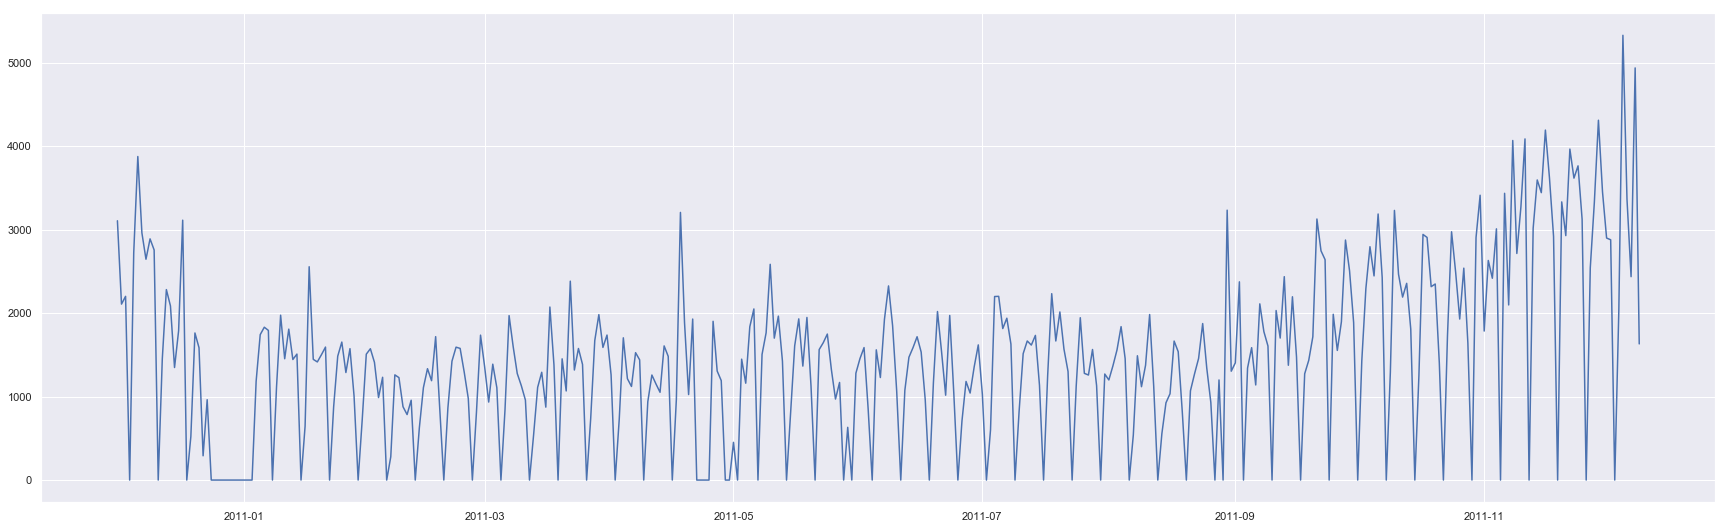

In [9]:
plt.figure(figsize = (30,9))
plt.plot(result3['InvoiceDate'],result3['Invoices'])
plt.show()

## Month wise Invoices

In [10]:
result4 = result2.groupby(pd.Grouper(freq = 'M')).sum()
result4.reset_index(inplace = True)
# print(result2)

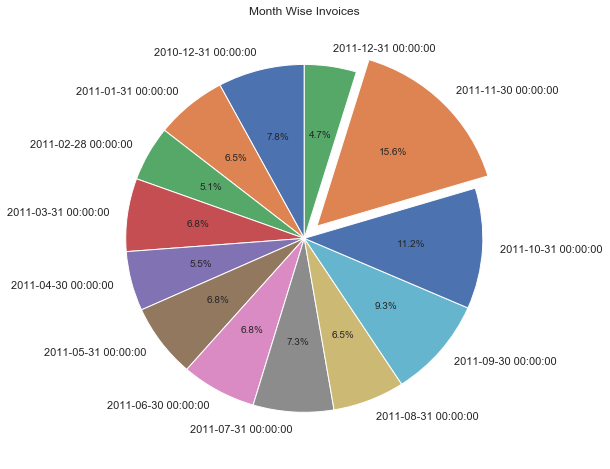

In [11]:
plt.figure(figsize = (8,8))
plt.title("Month Wise Invoices")
plt.pie(result4['Invoices'],labels = result4['InvoiceDate'],autopct = "%.1f%%",startangle = 90,explode = [0,0,0,0,0,0,0,0,0,0,0,0.1,0])
plt.show()

## Year wise Invoices

In [12]:
result5 = result2.groupby(pd.Grouper(freq = 'Y')).sum()
result5.reset_index(inplace = True)


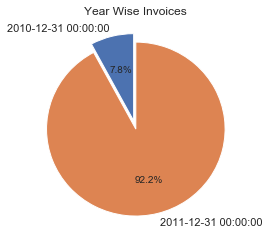

In [13]:
plt.figure(figsize = (4,4))
plt.title("Year Wise Invoices")
plt.pie(result5['Invoices'],labels = result5['InvoiceDate'],autopct = "%.1f%%",startangle = 90,explode = [0.1,0])
plt.show()

## Stock wise Amount

In [14]:
result6 = data.groupby(['StockCode']).agg({'StockCode':'count','Amount':'sum'})
result6.columns = ['Stock','Amount']
# result6.reset_index(inplace = True)
# print(result6)

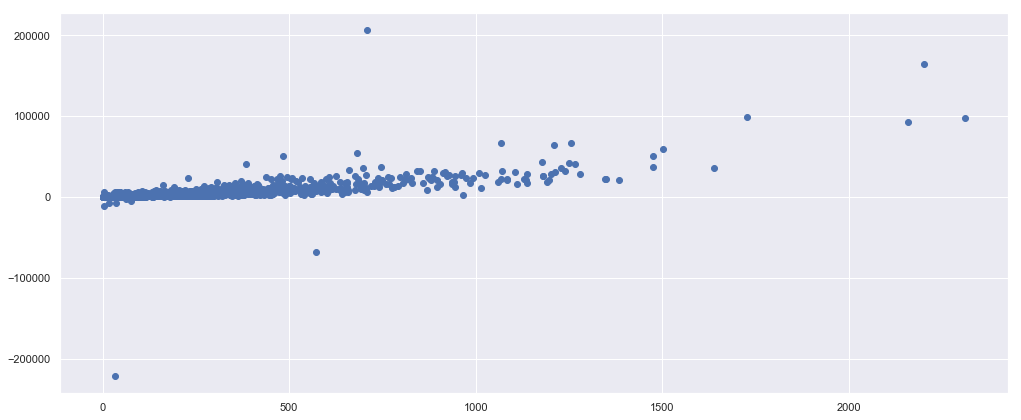

In [15]:
plt.figure(figsize = (17,7))
plt.scatter(result6['Stock'],result6['Amount'])
plt.show()

## CustomerID wise Total Amount, Units, Invoices

In [16]:
result8 = data.groupby(['CustomerID']).agg({
    'InvoiceNo' : 'count',
    'Quantity'      : 'sum',
    'Amount'        : 'sum' })

result8.columns = ['Invoices','Units','Total Amount']
result8 = result8.reset_index()

## Top 10 Customers wise Total Amount

In [50]:
result9 = result8[['CustomerID','Total Amount']].sort_values('Total Amount',ascending = False).head(10)
print(result9)

     CustomerID  Total Amount
1703    14646.0     279489.02
4233    18102.0     256438.49
3758    17450.0     187482.17
1895    14911.0     132572.62
55      12415.0     123725.45
1345    14156.0     113384.14
3801    17511.0      88125.38
3202    16684.0      65892.08
1005    13694.0      62653.10
2192    15311.0      59419.34


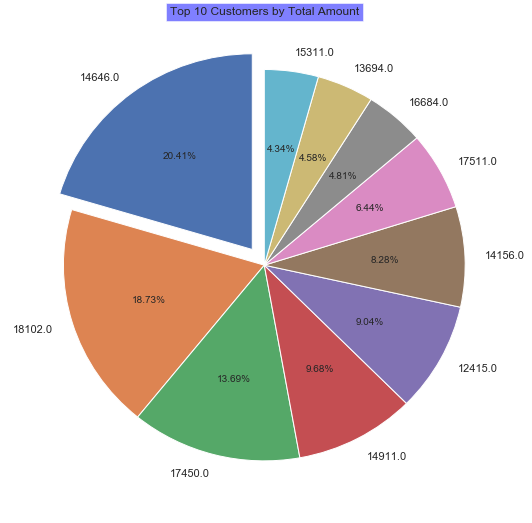

In [51]:
plt.figure(figsize = (9,9))
plt.title('Top 10 Customers by Total Amount',bbox = (dict(facecolor = 'Blue',alpha = 0.5)))
plt.pie(result9['Total Amount'],labels = result9['CustomerID'],autopct = "%.2f%%",explode = [0.1,0,0,0,0,0,0,0,0,0],startangle = 90)
plt.show()

## Top 10 Cutomers Units wise

In [52]:
result10 = result8[['CustomerID','Units']].sort_values('Units',ascending = False).head(10)
print(result10)

     CustomerID   Units
1703    14646.0  196719
55      12415.0   77242
1895    14911.0   77180
3758    17450.0   69029
4233    18102.0   64122
3801    17511.0   63012
1005    13694.0   61803
1447    14298.0   58021
1345    14156.0   57025
3202    16684.0   49390


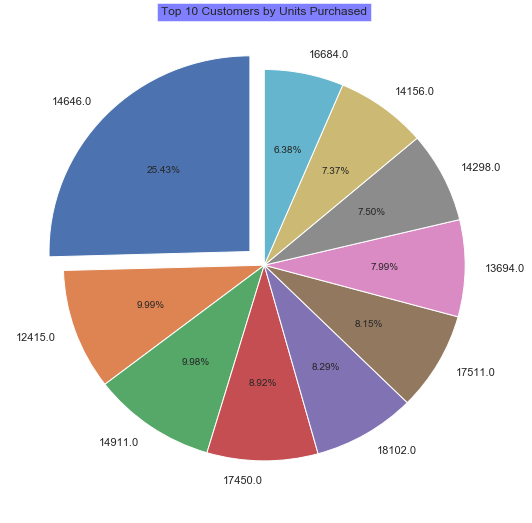

In [53]:
plt.figure(figsize = (9,9))
plt.title('Top 10 Customers by Units Purchased',bbox = (dict(facecolor = 'Blue',alpha = 0.5)))
plt.pie(result10['Units'],labels = result10['CustomerID'],autopct = "%.2f%%",explode = [0.1,0,0,0,0,0,0,0,0,0],startangle = 90)
plt.show()

## Top 10 Customers Invoices wise

In [54]:
result11 = result8[['CustomerID','Invoices']].sort_values('Invoices',ascending = False).head(10)
print(result11)

     CustomerID  Invoices
4042    17841.0      7983
1895    14911.0      5903
1300    14096.0      5128
330     12748.0      4642
1674    14606.0      2782
2192    15311.0      2491
1703    14646.0      2085
568     13089.0      1857
698     13263.0      1677
1447    14298.0      1640


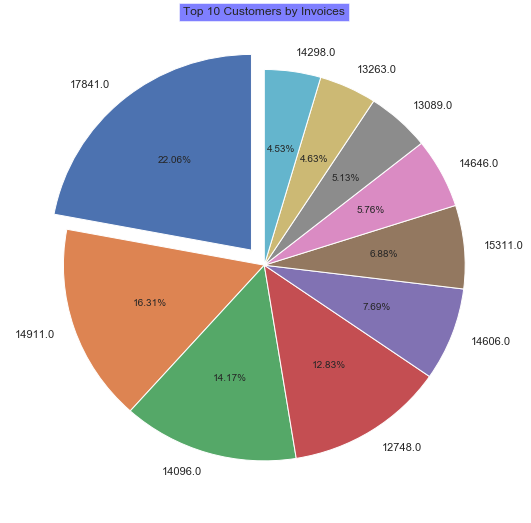

In [55]:
plt.figure(figsize = (9,9))
plt.title('Top 10 Customers by Invoices',bbox = (dict(facecolor = 'Blue',alpha = 0.5)))
plt.pie(result11['Invoices'],labels = result11['CustomerID'],autopct = "%.2f%%",explode = [0.1,0,0,0,0,0,0,0,0,0],startangle = 90)
plt.show()